In [1]:
import sys
import numpy as np
import matplotlib
import pandas as pd
import sklearn as sk
print("Python {}".format(sys.version))
print("Numpy {}".format(np.__version__))
print("matplotlib {}".format(matplotlib.__version__))
print("Pandas {}".format(pd.__version__))
print("sklearn {}".format(sk.__version__))

ModuleNotFoundError: No module named 'matplotlib'

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [22]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=["id","clump_thickness","uniform_cell_size","uniform_cell_shape","marginal_adhesion","single_epethelial_size","bare nuclei","bland_chromatin","normal_nucleoli","mitosis","class"]
df=pd.read_csv(url,names=names)

In [23]:
df.drop(['id'],1,inplace=True)
df.replace('?',-1,inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epethelial_size', 'bare nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]


In [24]:
print(df.shape)

(699, 10)


In [25]:
print(df.loc[0])

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epethelial_size    2
bare nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitosis                   1
class                     2
Name: 0, dtype: object


In [26]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epethelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


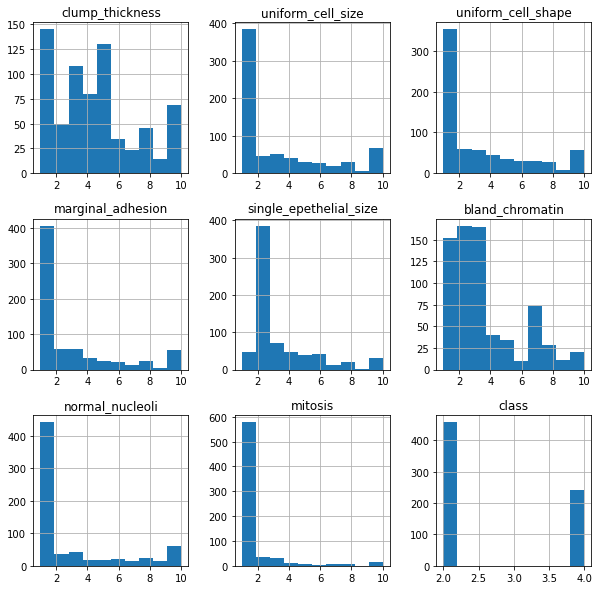

In [27]:
df.hist(figsize=(10,10))
plt.show()

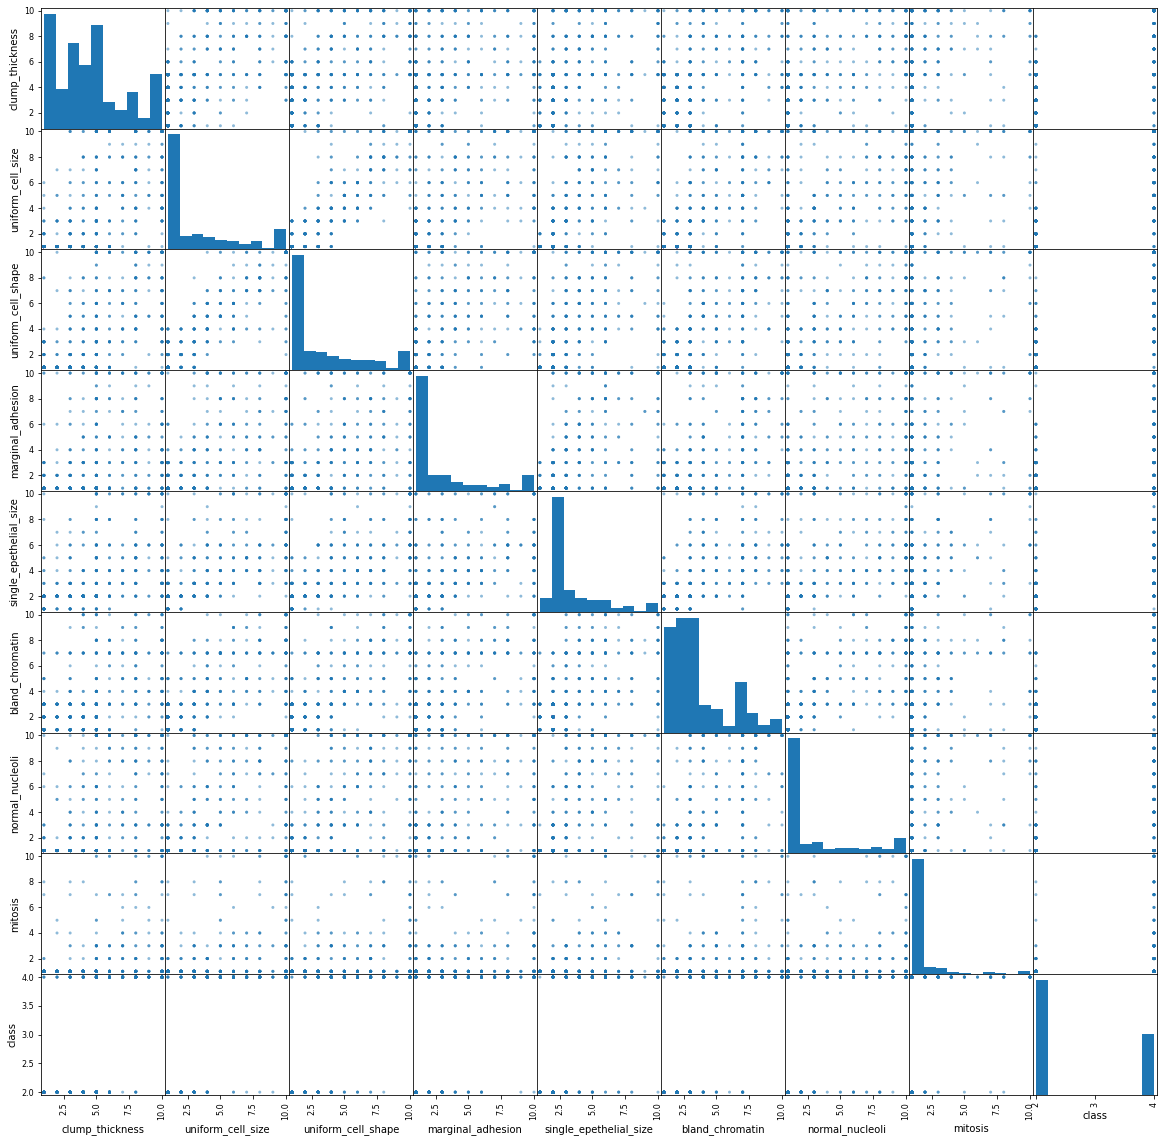

In [28]:
scatter_matrix(df,figsize=(20,20))
plt.show()

In [29]:
X=np.array(df.drop(['class'],1))
Y=np.array(df['class'])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [30]:
seed=8
scoring="accuracy"

In [32]:
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("SVM",SVC()))

In [36]:
for i,j in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    ok=model_selection.cross_val_score(j,X_train,Y_train,cv=kfold,scoring=scoring)
    print(ok.mean(),ok.std())

0.9677922077922076 0.013381823475436549
0.9696103896103896 0.011399017276619046


In [38]:
for i,j in models:
    op=j.fit(X_train,Y_train)
    pred=op.predict(X_test)
    print(accuracy_score(Y_test,pred))
    print(classification_report(Y_test,pred))

0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        91
           4       0.94      0.98      0.96        49

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

0.9571428571428572
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        91
           4       0.91      0.98      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

